#Denoising using Gaussian

It is technically Blurring the image by removing noises...Which is prerequisite to many filters and this is known as Gaussian Smoothing.

**<u>Convolution</u>:-**       
<img src='https://miro.medium.com/max/1400/1*O06nY1U7zoP4vE5AZEnxKA.gif' width=50%>

In [ ]:
# We will need convolution 2D filter from Scipy's signal module
from scipy.signal import convolve2d

In [ ]:
# Generate your kernel/filter
kernel = np.ones((3,3))/9

In [ ]:
# Let's see how it looks
kernel

array([[0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111]])

In [ ]:
# Create a gaussian kernel
gaussian_kernel = np.array([[1/16, 1/8, 1/16],
                            [1/8, 1/4, 1/8],
                            [1/16, 1/8, 1/16]])

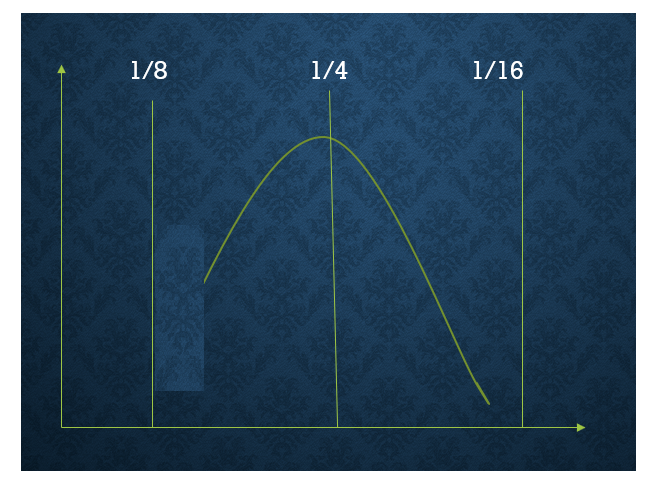

In [ ]:
# Get the convolution done using our kernel
convolved_image = convolve2d(M31_Pixels, kernel, mode='same')

In [ ]:
# Convolution done using gaussian kernel
gaussian_convolved_image = convolve2d(M31_Pixels, gaussian_kernel, mode='same')


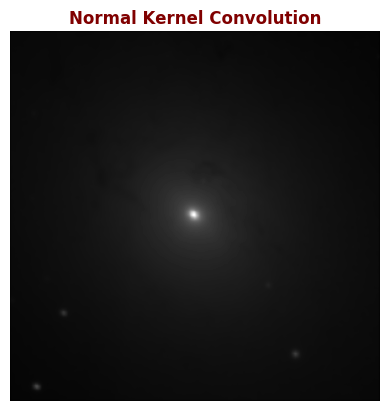

In [ ]:
# Vizulaise the first kernel convolution
plot_pixels(convolved_image, title='Normal Kernel Convolution', color='maroon')


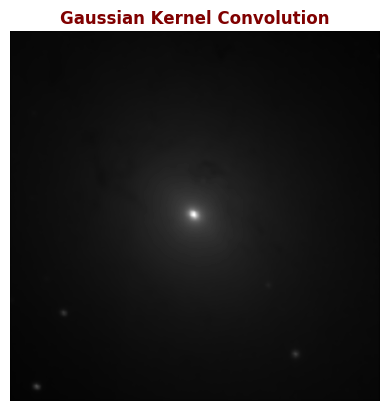

In [ ]:
# Visualize the gausian kernel convolved output
plot_pixels(gaussian_convolved_image, title='Gaussian Kernel Convolution', color='maroon')

In [ ]:
# Using grayscalel of M31 data to convolve with gaussian kernel
convolved_grayscale = convolve2d(grayscale_zint_array, gaussian_kernel, mode='same')

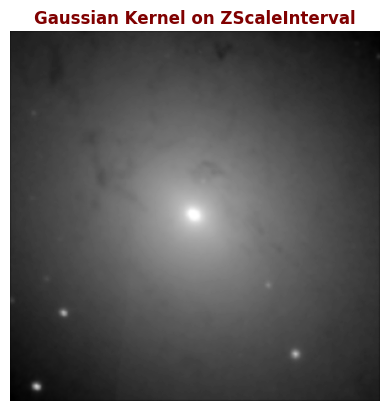

In [ ]:
# Check how this looks now!
plot_pixels(convolved_grayscale, title='Gaussian Kernel on ZScaleInterval', color='maroon')

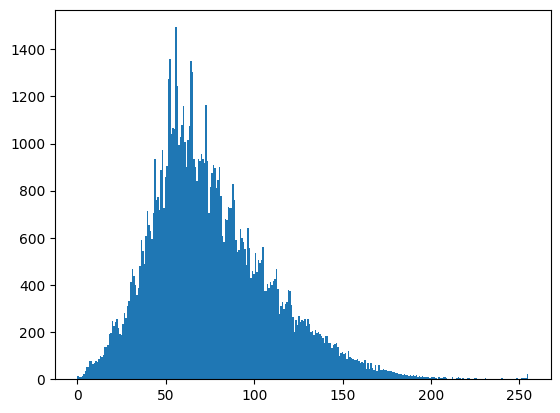

In [ ]:
# Get the histogram
plt.hist(convolved_grayscale.flat, bins=300)
plt.show()

## Enhancing the Linear Features on M31
Take a look onto different available filters in skimage:-
https://scikit-image.org/docs/stable/api/skimage.filters.html

In [ ]:
# Create spectral list to use later
SPECTRAL_LIST = ["gray","jet","hot","prism","nipy_spectral"]

In [ ]:
# Import meijering and sato filters from skimage
from skimage.filters import meijering, sato

In [ ]:
# Implement these filters on the convolved image
meijering_output = meijering(convolved_grayscale)
sato_output = sato(convolved_grayscale)

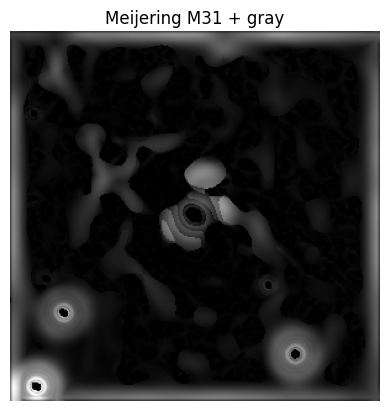

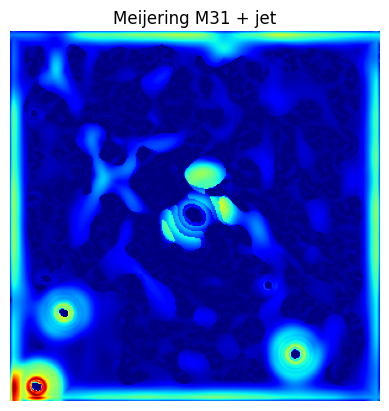

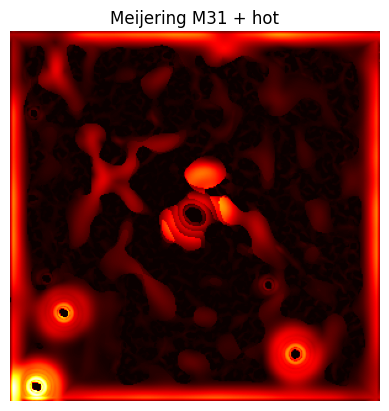

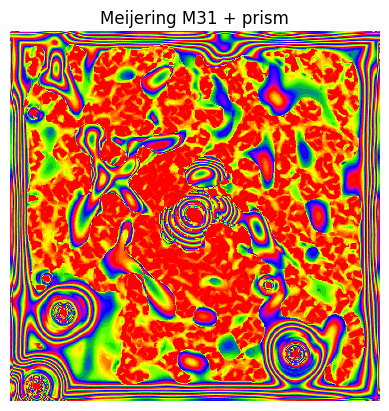

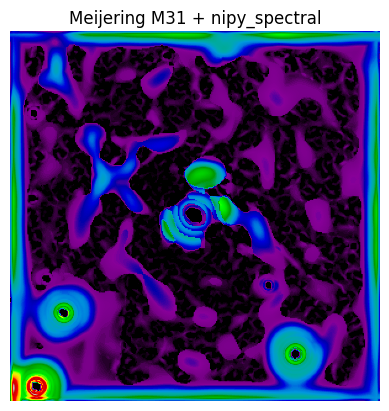

In [ ]:
# For each element in the spectral list visulize the output for the meijering filer!
for colormap in SPECTRAL_LIST:
  plt.imshow(meijering_output, cmap=colormap, origin='lower')
  plt.title(f'Meijering M31 + {colormap}')
  plt.axis('off')
  plt.show()

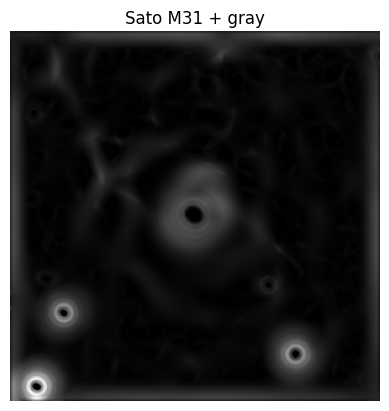

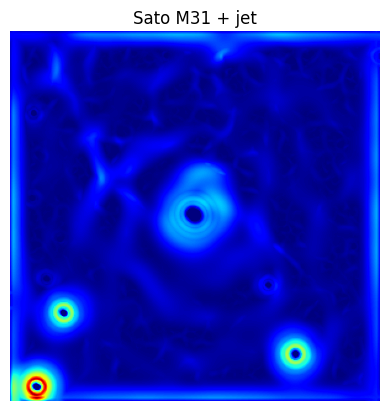

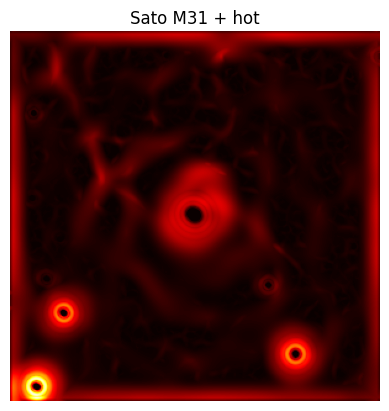

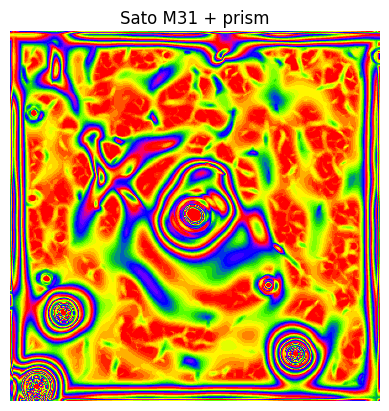

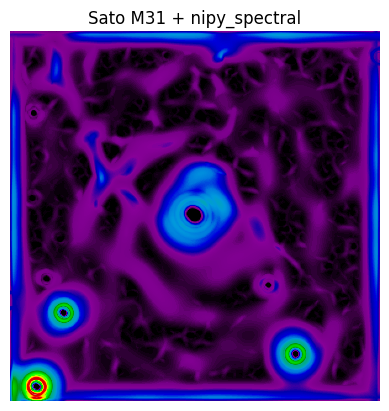

In [ ]:
# For each element in the spectral list visulize the output for the sato filer!
for colormap in SPECTRAL_LIST:
  plt.imshow(sato_output, cmap=colormap, origin='lower')
  plt.title(f'Sato M31 + {colormap}')
  plt.axis('off')
  plt.show()


## Feature Detection and Extraction

skiamge different features:- https://scikit-image.org/docs/stable/api/skimage.feature.html

Skimage Feature used for Feature detection and extraction, e.g., texture analysis corners, etc.

### corner_foerstner

A fast operator for detection and precise location of distinct points, corners and centres of circular features

In [ ]:
# Import feature module from skimage
from skimage.feature import corner_foerstner

In [ ]:
# log_scaled pixels or standard scale pixes or Normalized pixels
feature_output = corner_foerstner(convolved_grayscale)

In [ ]:
# Check the output of the featured image
feature_output[1]

array([[0.4989641 , 0.21946652, 0.20260812, ..., 0.24883013, 0.65938198,
        0.71467819],
       [0.39800763, 0.23215066, 0.14497339, ..., 0.54766745, 0.90813068,
        0.66235114],
       [0.24457695, 0.17733225, 0.10416085, ..., 0.98735337, 0.55825765,
        0.25356002],
       ...,
       [0.22429728, 0.51726484, 0.96709646, ..., 0.6867379 , 0.62290977,
        0.29146722],
       [0.64334682, 0.9009524 , 0.55832027, ..., 0.49465811, 0.75665701,
        0.5648419 ],
       [0.71794373, 0.66759447, 0.2532344 , ..., 0.24465286, 0.53700323,
        0.60483135]])

In [ ]:
# Type of the featured image
type(feature_output)

tuple

In [ ]:
# Check the length of the tuple
len(feature_output)

2

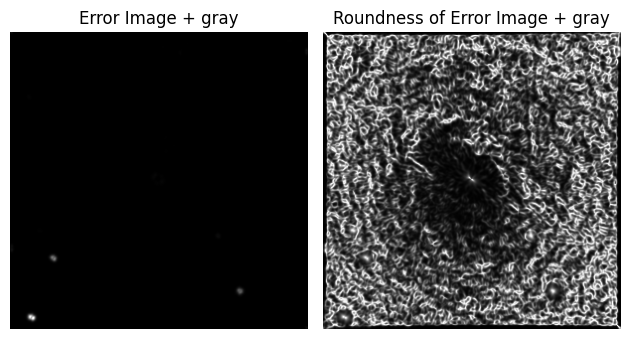

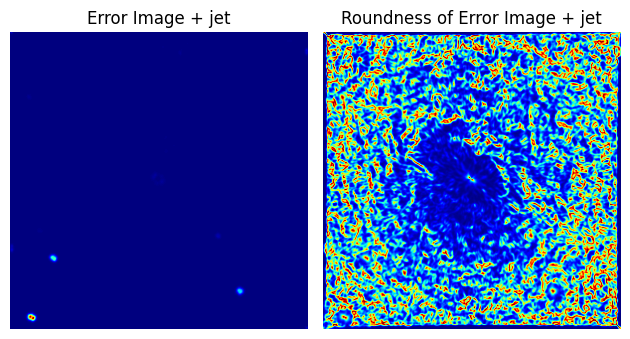

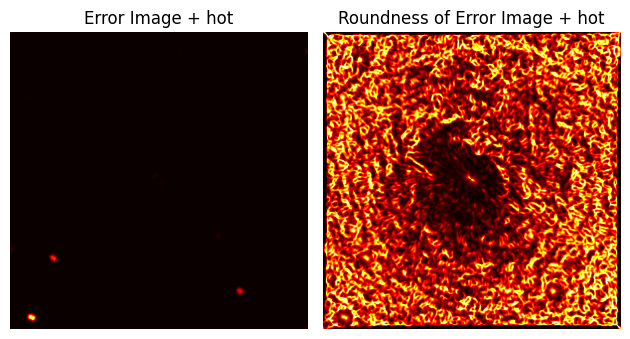

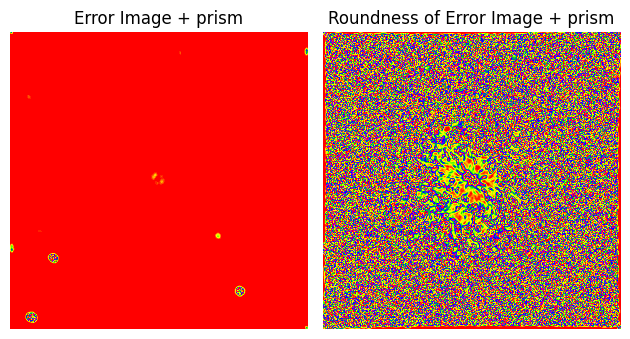

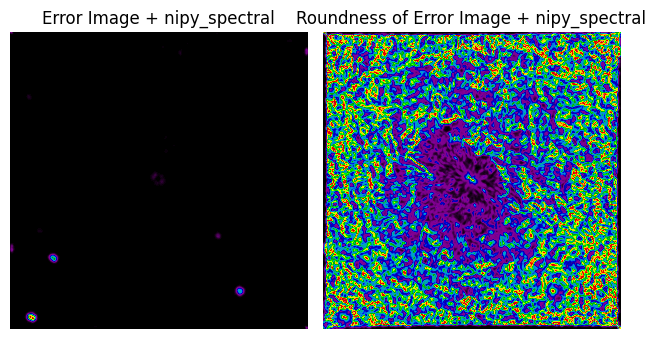

In [ ]:
# Subplot Visualization
for colormap in SPECTRAL_LIST:
  plt.subplot(1, 2, 1)
  plt.imshow(feature_output[0], cmap=colormap, origin='lower')
  plt.title(f'Error Image + {colormap}')
  plt.axis('off')

  plt.subplot(1, 2, 2)
  plt.imshow(feature_output[1], cmap=colormap, origin='lower')
  plt.title(f'Roundness of Error Image + {colormap}')
  plt.axis('off')

  plt.tight_layout()
  plt.show()

### multiscale_basic_features (Local Features)

In [ ]:
# Import this feature
from skimage.feature import multiscale_basic_features

In [ ]:
# Generate again a new featured image
featured_image = multiscale_basic_features(convolved_grayscale)

In [ ]:
# Get type
type(featured_image)

numpy.ndarray

In [ ]:
# Shape
featured_image.shape

(300, 300, 24)

In [ ]:
# Storing each and every channel from P1 to P24
P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24 = cv2.split(featured_image)

In [ ]:
# Check P1
P1.shape

(300, 300)

In [ ]:
# What about last one - P24
P24.shape

(300, 300)

In [ ]:
# Create list of these pixels for each channel
Pixels = [P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24]

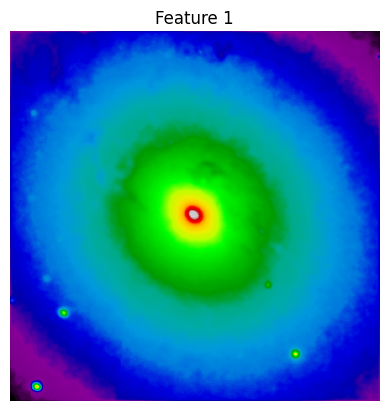

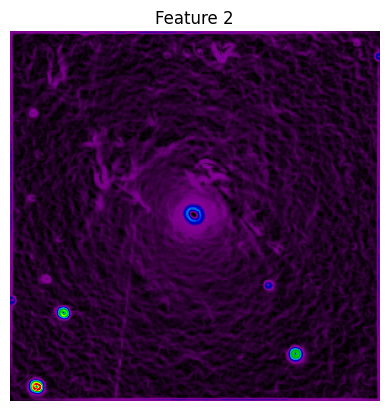

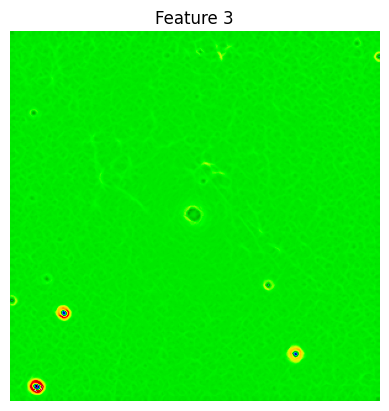

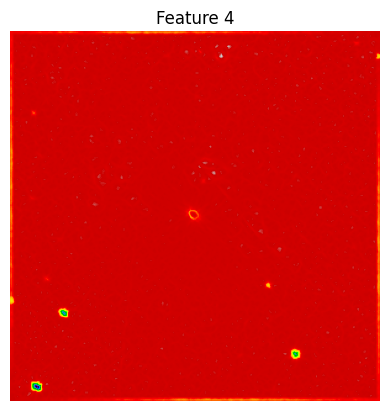

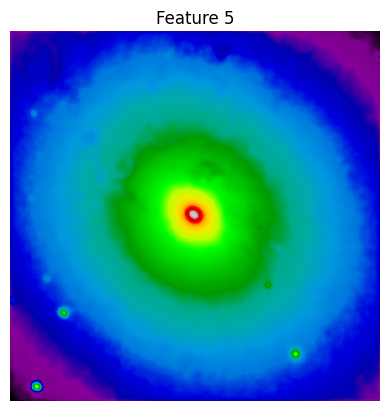

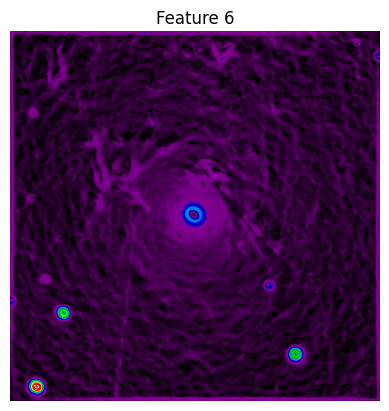

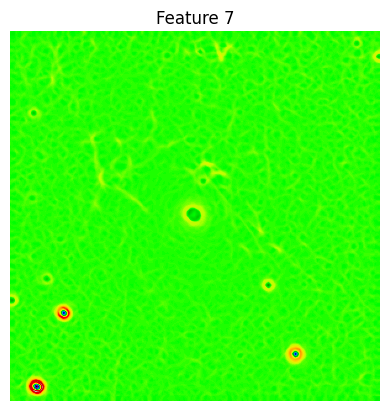

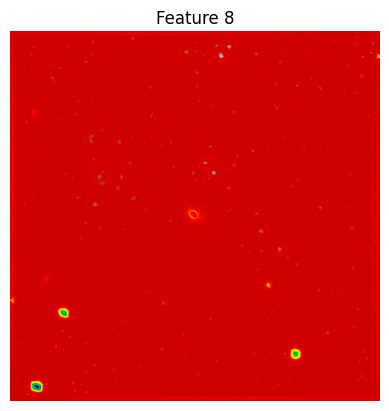

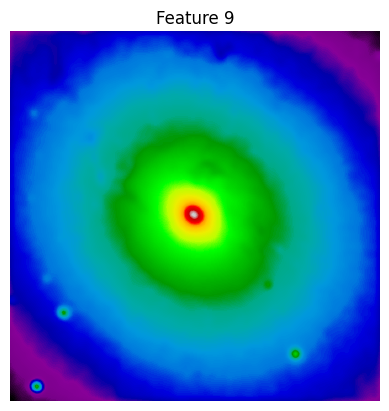

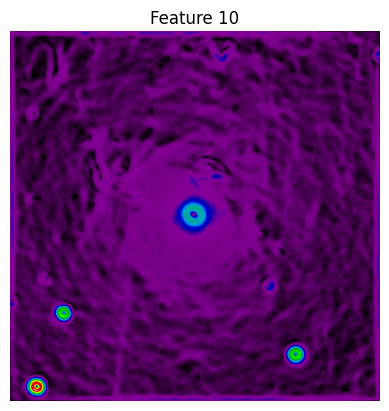

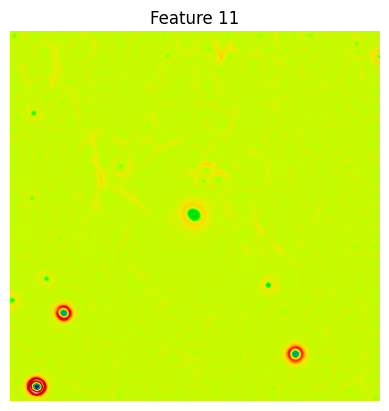

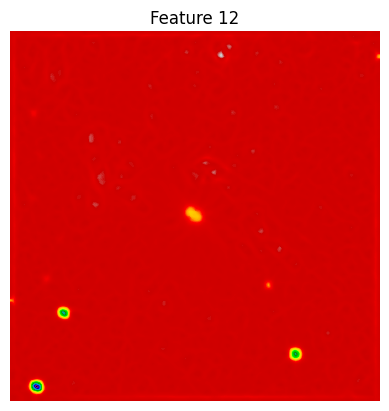

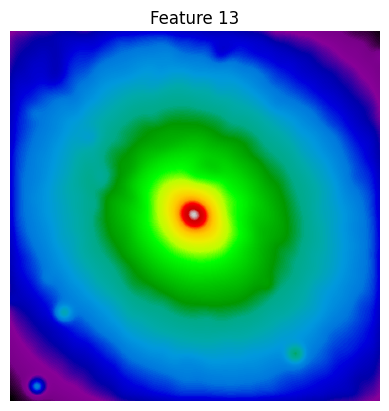

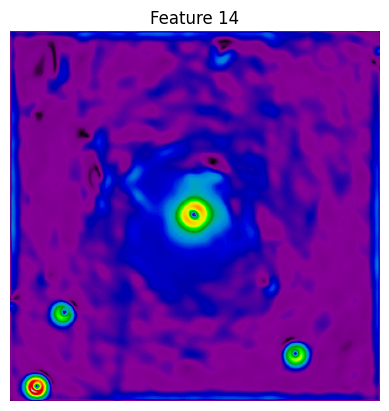

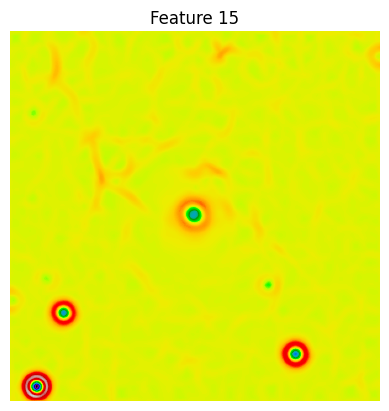

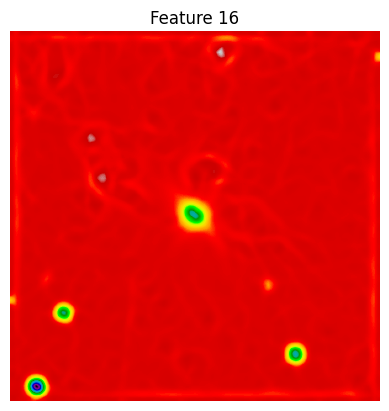

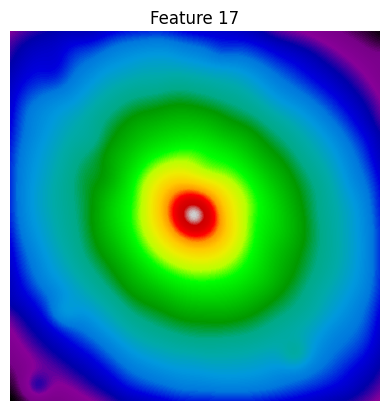

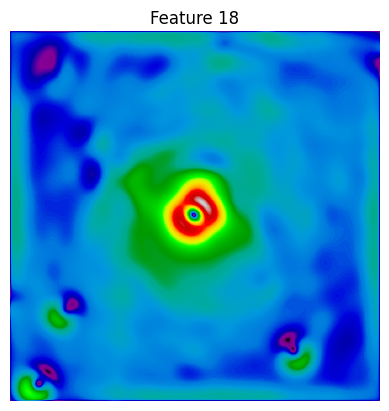

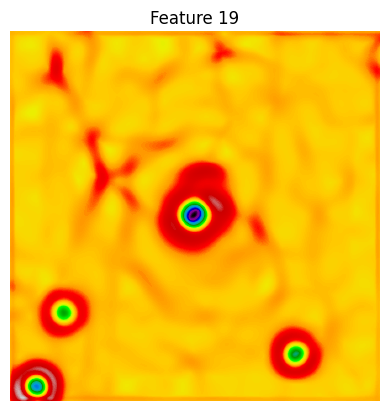

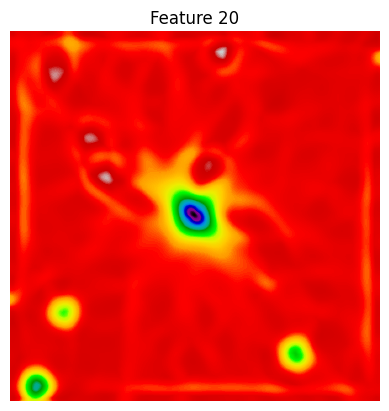

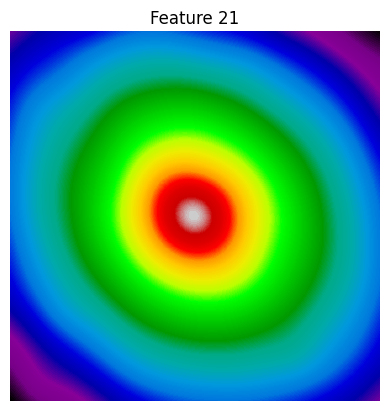

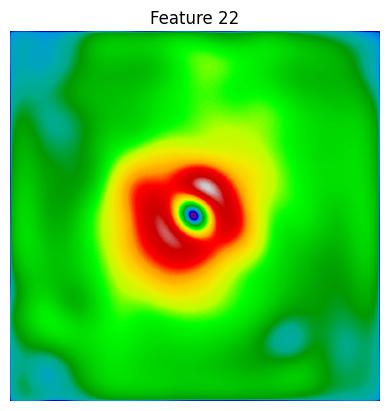

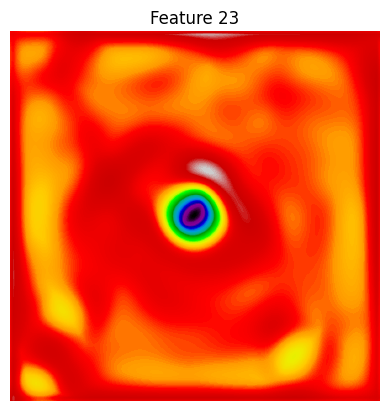

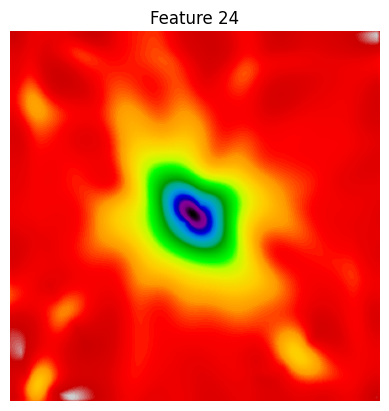

In [ ]:
# Visualize each channel using prism spectral
for i, feature in enumerate(Pixels):
  plt.imshow(feature, cmap='nipy_spectral', origin='lower')
  plt.title(f'Feature {i+1}')
  plt.axis('off')
  plt.show()